#Pragmatic Introduction to Daala: DCT Fundamentals
Luc Trudeau

## Why is the DCT used?

The main interest in the discrete cosine transform (DCT) is that it will compact the energy of the values of an input vector. This turns out the be very usefull for compression.

Let's consider the following vector:

Populating the interactive namespace from numpy and matplotlib


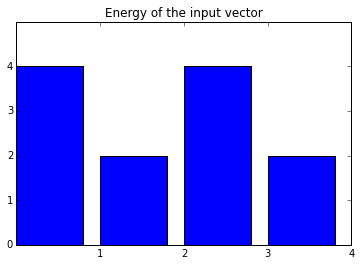

In [3]:
import numpy as np

%pylab inline
v = np.array([4, 2, 4, 2])

def showEnergy(e, title):
    x = np.arange(4)
    pylab.bar(x, e)
    pylab.yticks(range(0,5))
    pylab.xticks([1, 2, 3, 4])
    pylab.xlim(0, 4);
    pylab.ylim(0, 5);
    pylab.title(title)

showEnergy(v, "Energy of the input vector")

## What does the DCT do?
As you can see, the energy is spread accross the vector. Applying the DCT to _v_ will produce an output vector where most of the energy will be located at the beginning of the vector.

## How does the DCT work?

If you lookup DCT on Wikipedia, you will find the DCT-II equation (we will use this form of the DCT):

$$X_k = \sum_{n=0}^{N-1} x_n \cos \left[ \frac{\pi}{N} \left( n + \frac{1}{2} \right) k \right] $$

So what does this equation mean?
 * The variable $x$ is the input vector and $X$ is the output vector.
 * The variable $k$ is the index of the value we want to compute in the output vector. 
 * The variable $N$ is the length of the vector.

### The Basis functions
The $\cos$ might seem intimidating at first, but notice that there's is no $x$ inside of it. In other words, any input vector of length 4 will have the same $\cos$ part. These are the 4 basis of our 4 point transform. Let's have a look at these basis:

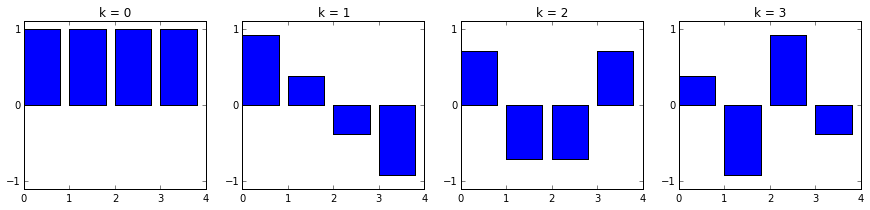

In [43]:
pylab.figure(figsize=(15,3))

def basis(k, N):
    n = arange(0,N)
    return cos(pi/N*(n+1/2)*k)

def showBasisFunction(k):
    pylab.bar(range(0,4), basis(k,len(v)))
    pylab.yticks([-1, 0, 1])
    pylab.xticks(range(0,5))
    pylab.xlim(0, 4);
    pylab.ylim(-1.1, 1.1);
    pylab.title("k = %d"%k)

pylab.subplot(1,4,1)
showBasisFunction(0)
pylab.subplot(1,4,2)
showBasisFunction(1)
pylab.subplot(1,4,3)
showBasisFunction(2)
pylab.subplot(1,4,4)
showBasisFunction(3)

Notice that the first basis $(k = 0)$ does not oscillate, this basis is called the DC. The other basis oscillate and are referred to as AC. This is reminescent of direct current and alternating current: 
[![TypesOfCurrent](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Types_of_current.svg/500px-Types_of_current.svg.png)](https://en.wikipedia.org/wiki/Direct_current)

Notice that oscillations of the basis functions increase as $k$ increase, we will come back to this later. For now, let's use our basis function to perform the DCT on $v$. 

### Computing the DCT

To compute our ouput vector we need to sum the multiplication of each value of the vector by the corresponding basis. 

In [62]:
def dct(v):
    N = len(v)
    X = np.zeros([4,1])
    for k in range(0, N):
        X[k] = sum(v[k] * basis(k, N))
    return X

X = dct(v)

print("Transformed input vector %s", X)

Transformed input vector %s [[  1.60000000e+01]
 [  2.22044605e-16]
 [ -4.44089210e-16]
 [ -4.44089210e-16]]


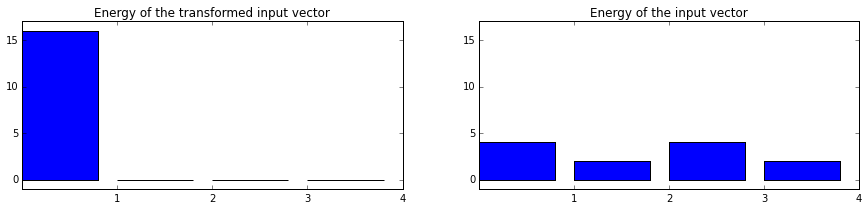

In [68]:
pylab.figure(figsize=(15,3))
def showTransformedEnergy(e, title):
    x = np.arange(4)
    pylab.bar(x, e)
    pylab.xticks([1, 2, 3, 4])
    pylab.xlim(0, 4);
    pylab.ylim(-1, 17);
    pylab.title(title)
    
pylab.subplot(1,2,1)
showTransformedEnergy(X, "Energy of the transformed input vector")
pylab.subplot(1,2,2)
showTransformedEnergy(v, "Energy of the input vector")

> Wait a second, if I use the dct function in << INSERT FAVORITE MATH SOFTWARE HERE >> I get [6 0.7654 0 1.8478] as my transformed vector, what's going on?

That will be the topic of part 2

![To Be Continued](images/continued.jpg)

**Let me know what you want to see in part 2 (Twitter @LT_Pragmatic).**

##Further Reading

 - Wikipedia, _Discrete cosine transform_, https://en.wikipedia.org/wiki/Discrete_cosine_transform
 - Yao Wang, _DCT and Transform Coding_, http://eeweb.poly.edu/~yao/EE3414/ImageCoding_DCT.pdf